<a href="https://colab.research.google.com/github/skaurl/tourbigdata/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rcParams["figure.figsize"] = (10,10)

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [3]:
import pandas as pd
import numpy as np

df20 = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/신한카드/신한카드 데이터/KCTI_NATIVE_2020.txt", sep = "|", encoding = 'cp949')
df20 = df20[df20['ta_ym'] != 202001]
df20['ta_ym'] = df20['ta_ym']-202000
df20['cln_age_r'] = df20['cln_age_r'].astype('object')
df20['ta_ym'] = df20['ta_ym'].astype('object')
df20 = df20.rename({"vlm":"vlm20","usec":"usec20"},axis="columns")
del df20['v1']

df19 = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/신한카드/신한카드 데이터/KCTI_NATIVE_2019.txt", sep = "|", encoding = 'cp949')
df19 = df19[df19['ta_ym'] != 201901]
df19 = df19[df19['ta_ym'] != 201907]
df19 = df19[df19['ta_ym'] != 201908]
df19 = df19[df19['ta_ym'] != 201909]
df19 = df19[df19['ta_ym'] != 201910]
df19 = df19[df19['ta_ym'] != 201911]
df19 = df19[df19['ta_ym'] != 201912]
df19['ta_ym'] = df19['ta_ym']-201900
df19['cln_age_r'] = df19['cln_age_r'].astype('object')
df19['ta_ym'] = df19['ta_ym'].astype('object')
df19 = df19.rename({"vlm":"vlm19","usec":"usec19"},axis="columns")
del df19['v1']

#data20 = df20.groupby([df20["v2"],df20["gb3"],df20["gb2"],df20["sex_ccd"],df20["cln_age_r"],df20["ta_ym"],df20["daw_ccd_r"],df20["apv_ts_dl_tm_r"]]).sum()
#data20 = df20.groupby([df20["v2"],df20["gb3"],df20["gb2"],df20["sex_ccd"],df20["cln_age_r"],df20["ta_ym"]]).sum()
data20 = df20.groupby([df20["v2"],df20["gb3"],df20["sex_ccd"],df20["cln_age_r"],df20["ta_ym"]]).sum()

#data19 = df19.groupby([df19["v2"],df19["gb3"],df19["gb2"],df19["sex_ccd"],df19["cln_age_r"],df19["ta_ym"],df19["daw_ccd_r"],df19["apv_ts_dl_tm_r"]]).sum()
#data19 = df19.groupby([df19["v2"],df19["gb3"],df19["gb2"],df19["sex_ccd"],df19["cln_age_r"],df19["ta_ym"]]).sum()
data19 = df19.groupby([df19["v2"],df19["gb3"],df19["sex_ccd"],df19["cln_age_r"],df19["ta_ym"]]).sum()

df = pd.merge(data20, data19, left_index=True, right_index=True, how="outer")

df = df.dropna(axis=0)

df['vlm_usec_ratio'] = (df["vlm20"]/df["usec20"])/(df["vlm19"]/df["usec19"])
df['vlm_ratio'] = (df["vlm20"]-df["vlm19"])/df["vlm19"]

df = df.reset_index()

df['cln_age_r'] = df['cln_age_r'].astype('object')
df["ta_ym"] = df["ta_ym"].astype("int")
df["ta_ym"] = df["ta_ym"].astype("object")

print(df)
print("==================================================")
print(df.dtypes)
print("==================================================")
print("v2 : ",len(list(set(df['v2']))),list(set(df['v2'])))
print("gb3 : ",len(list(set(df['gb3']))),list(set(df['gb3'])))
#print("gb2 : ",len(list(set(df['gb2']))),list(set(df['gb2'])))
print("sex_ccd : ",len(list(set(df['sex_ccd']))),list(set(df['sex_ccd'])))
print("cln_age_r : ",len(list(set(df['cln_age_r']))),list(set(df['cln_age_r'])))
print("ta_ym : ",len(list(set(df['ta_ym']))),list(set(df['ta_ym'])))
#print("daw_ccd_r : ",len(list(set(df['daw_ccd_r']))),list(set(df['daw_ccd_r'])))
#print("apv_ts_dl_tm_r : ",len(list(set(df['apv_ts_dl_tm_r']))),list(set(df['apv_ts_dl_tm_r'])))

      v2     gb3 sex_ccd  ...  usec19 vlm_usec_ratio  vlm_ratio
0     강원  문화예술활동       F  ...   29386       1.243426  -0.081542
1     강원  문화예술활동       F  ...   28005       1.336065  -0.493340
2     강원  문화예술활동       F  ...   25285       1.397372  -0.293273
3     강원  문화예술활동       F  ...   30074       1.500363  -0.128489
4     강원  문화예술활동       F  ...   37932       3.144255   0.910575
...   ..     ...     ...  ...     ...            ...        ...
3395  충북    취미오락       M  ...  726604       0.916454   0.020124
3396  충북    취미오락       M  ...  876332       0.909863  -0.060673
3397  충북    취미오락       M  ...  876258       0.971983   0.074210
3398  충북    취미오락       M  ...  943264       1.026779   0.342179
3399  충북    취미오락       M  ...  926218       0.980517   0.217762

[3400 rows x 11 columns]
v2                 object
gb3                object
sex_ccd            object
cln_age_r          object
ta_ym              object
vlm20             float64
usec20              int64
vlm19             float6

In [4]:
import pandas as pd
import numpy as np

population = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/행정구역(시군구)별 인구수.csv", encoding = 'cp949')
population = population.iloc[:,1:].astype("int")

print(population)

      Feb.20    Mar.20    Apr.20    May.20    Jun.20
0   51844627  51843195  51842524  51841371  51839408
1    9736962   9733655   9726787   9724496   9720846
2    3410925   3409932   3408347   3406942   3404423
3    2432883   2433568   2431523   2429059   2427954
4    2954955   2952689   2950972   2950063   2947217
5    1456121   1455705   1456096   1455533   1455048
6    1473125   1471858   1471650   1471915   1471040
7    1145710   1144563   1144098   1143148   1142190
8     343788    344792    345216    345373    345341
9   13265377  13288975  13311254  13324041  13338020
10   1539521   1538577   1537780   1538639   1539282
11   1598599   1597639   1596613   1596710   1597593
12   2120995   2119749   2118457   2118510   2119771
13   1815112   1812936   1811619   1810097   1808802
14   1861894   1859290   1857083   1855945   1854618
15   2658956   2653418   2651054   2648760   2646493
16   3358828   3355341   3353380   3351347   3349454
17    670876    670508    670595    670793    

In [5]:
import pandas as pd
import numpy as np

df_Time = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/코로나/Data Science for COVID-19 (DS4C)/Time.csv", encoding = 'cp949')

df_Time = df_Time[(df_Time["date"]=="2020-02-29") | (df_Time["date"]=="2020-03-31") | (df_Time["date"]=="2020-04-30") | (df_Time["date"]=="2020-05-31") | (df_Time["date"]=="2020-06-30")]

for i in range(len(df_Time)):
    df_Time.iloc[i,0] = df_Time.iloc[i,0][-4]

df_Time["test_cum"] = df_Time["test"]
df_Time["negative_cum"] = df_Time["negative"]
df_Time["confirmed_cum"] = df_Time["confirmed"]
df_Time["released_cum"] = df_Time["released"]
df_Time["deceased_cum"] = df_Time["deceased"]

for i in range(len(df_Time)-1):
    df_Time.iloc[4-i,2:7] = df_Time.iloc[4-i,2:7] - df_Time.iloc[3-i,2:7]

df_Time["test_diff"] = df_Time["test"]
df_Time["negative_diff"] = df_Time["negative"]
df_Time["confirmed_diff"] = df_Time["confirmed"]
df_Time["released_diff"] = df_Time["released"]
df_Time["deceased_diff"] = df_Time["deceased"]

for i in range(len(df_Time)-1):
    df_Time.iloc[4-i,-5:] = df_Time.iloc[4-i,-5:] - df_Time.iloc[3-i,-5:]

for i in range(len(df_Time)):
    df_Time.iloc[i,1:] = (100000*df_Time.iloc[i,1:])/population.iloc[0,i]

del df_Time["time"]

df_Time["date"] = df_Time["date"].astype("int")
df_Time["date"] = df_Time["date"].astype("object")

df_Time = df_Time.rename(columns={'test':'nationwide_test','negative':'nationwide_negative','confirmed':'nationwide_confirmed','released':'nationwide_released','deceased':'nationwide_deceased','test_cum':'nationwide_test_cum','negative_cum':'nationwide_negative_cum','confirmed_cum':'nationwide_confirmed_cum','released_cum':'nationwide_released_cum','deceased_cum':'nationwide_deceased_cum','test_diff':'nationwide_test_diff','negative_diff':'nationwide_negative_diff','confirmed_diff':'nationwide_confirmed_diff','released_diff':'nationwide_released_diff','deceased_diff':'nationwide_deceased_diff'})

print(df_Time)

    date  nationwide_test  ...  nationwide_released_diff  nationwide_deceased_diff
40     2       181.417064  ...                  0.054008                  0.032790
71     3       610.512141  ...                 10.323438                  0.246898
101    4       403.755419  ...                 -3.335100                 -0.115735
132    5       561.213939  ...                 -4.446256                 -0.119596
162    6       700.131452  ...                 -0.412813                 -0.021219

[5 rows x 16 columns]


In [6]:
import pandas as pd
import numpy as np

df_TimeProvince = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/코로나/Data Science for COVID-19 (DS4C)/TimeProvince.csv", encoding = 'cp949')

df_TimeProvince = df_TimeProvince[(df_TimeProvince["date"]=="2020-02-29") | (df_TimeProvince["date"]=="2020-03-31") | (df_TimeProvince["date"]=="2020-04-30") | (df_TimeProvince["date"]=="2020-05-31") | (df_TimeProvince["date"]=="2020-06-30")]

for i in range(len(df_TimeProvince)):
    df_TimeProvince.iloc[i,0] = df_TimeProvince.iloc[i,0][-4]

for i in range(len(df_TimeProvince)):
    if df_TimeProvince.iloc[i,2] == "Seoul":
        df_TimeProvince.iloc[i,2] = "서울"
    elif df_TimeProvince.iloc[i,2] == "Busan":
        df_TimeProvince.iloc[i,2] = "부산"
    elif df_TimeProvince.iloc[i,2] == "Daegu":
        df_TimeProvince.iloc[i,2] = "대구"
    elif df_TimeProvince.iloc[i,2] == "Incheon":
        df_TimeProvince.iloc[i,2] = "인천"
    elif df_TimeProvince.iloc[i,2] == "Gwangju":
        df_TimeProvince.iloc[i,2] = "광주"
    elif df_TimeProvince.iloc[i,2] == "Daejeon":
        df_TimeProvince.iloc[i,2] = "대전"
    elif df_TimeProvince.iloc[i,2] == "Ulsan":
        df_TimeProvince.iloc[i,2] = "울산"
    elif df_TimeProvince.iloc[i,2] == "Sejong":
        df_TimeProvince.iloc[i,2] = "세종"
    elif df_TimeProvince.iloc[i,2] == "Gyeonggi-do":
        df_TimeProvince.iloc[i,2] = "경기"
    elif df_TimeProvince.iloc[i,2] == "Gangwon-do":
        df_TimeProvince.iloc[i,2] = "강원"
    elif df_TimeProvince.iloc[i,2] == "Chungcheongbuk-do":
        df_TimeProvince.iloc[i,2] = "충북"
    elif df_TimeProvince.iloc[i,2] == "Chungcheongnam-do":
        df_TimeProvince.iloc[i,2] = "충남"
    elif df_TimeProvince.iloc[i,2] == "Jeollabuk-do":
        df_TimeProvince.iloc[i,2] = "전북"
    elif df_TimeProvince.iloc[i,2] == "Jeollanam-do":
        df_TimeProvince.iloc[i,2] = "전남"
    elif df_TimeProvince.iloc[i,2] == "Gyeongsangbuk-do":
        df_TimeProvince.iloc[i,2] = "경북"
    elif df_TimeProvince.iloc[i,2] == "Gyeongsangnam-do":
        df_TimeProvince.iloc[i,2] = "경남"
    elif df_TimeProvince.iloc[i,2] == "Jeju-do":
        df_TimeProvince.iloc[i,2] = "제주"

df_TimeProvince["confirmed_cum"] = df_TimeProvince["confirmed"]
df_TimeProvince["released_cum"] = df_TimeProvince["released"]
df_TimeProvince["deceased_cum"] = df_TimeProvince["deceased"]

del df_TimeProvince["time"]

df_TimeProvince_Seoul = df_TimeProvince[df_TimeProvince["province"]=="서울"]
for i in range(len(df_TimeProvince_Seoul)-1):
    df_TimeProvince_Seoul.iloc[4-i,2:5] = df_TimeProvince_Seoul.iloc[4-i,2:5] - df_TimeProvince_Seoul.iloc[3-i,2:5]
df_TimeProvince_Seoul["confirmed_diff"] = df_TimeProvince_Seoul["confirmed"]
df_TimeProvince_Seoul["released_diff"] = df_TimeProvince_Seoul["released"]
df_TimeProvince_Seoul["deceased_diff"] = df_TimeProvince_Seoul["deceased"]
for i in range(len(df_TimeProvince_Seoul)-1):
    df_TimeProvince_Seoul.iloc[4-i,-3:] = df_TimeProvince_Seoul.iloc[4-i,-3:] - df_TimeProvince_Seoul.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Seoul)):
    df_TimeProvince_Seoul.iloc[i,2:] = (100000*df_TimeProvince_Seoul.iloc[i,2:])/population.iloc[1,i]

df_TimeProvince_Busan = df_TimeProvince[df_TimeProvince["province"]=="부산"]
for i in range(len(df_TimeProvince_Busan)-1):
    df_TimeProvince_Busan.iloc[4-i,2:5] = df_TimeProvince_Busan.iloc[4-i,2:5] - df_TimeProvince_Busan.iloc[3-i,2:5]
df_TimeProvince_Busan["confirmed_diff"] = df_TimeProvince_Busan["confirmed"]
df_TimeProvince_Busan["released_diff"] = df_TimeProvince_Busan["released"]
df_TimeProvince_Busan["deceased_diff"] = df_TimeProvince_Busan["deceased"]
for i in range(len(df_TimeProvince_Busan)-1):
    df_TimeProvince_Busan.iloc[4-i,-3:] = df_TimeProvince_Busan.iloc[4-i,-3:] - df_TimeProvince_Busan.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Busan)):
    df_TimeProvince_Busan.iloc[i,2:] = (100000*df_TimeProvince_Busan.iloc[i,2:])/population.iloc[2,i]

df_TimeProvince_Daegu = df_TimeProvince[df_TimeProvince["province"]=="대구"]
for i in range(len(df_TimeProvince_Daegu)-1):
    df_TimeProvince_Daegu.iloc[4-i,2:5] = df_TimeProvince_Daegu.iloc[4-i,2:5] - df_TimeProvince_Daegu.iloc[3-i,2:5]
df_TimeProvince_Daegu["confirmed_diff"] = df_TimeProvince_Daegu["confirmed"]
df_TimeProvince_Daegu["released_diff"] = df_TimeProvince_Daegu["released"]
df_TimeProvince_Daegu["deceased_diff"] = df_TimeProvince_Daegu["deceased"]
for i in range(len(df_TimeProvince_Daegu)-1):
    df_TimeProvince_Daegu.iloc[4-i,-3:] = df_TimeProvince_Daegu.iloc[4-i,-3:] - df_TimeProvince_Daegu.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Daegu)):
    df_TimeProvince_Daegu.iloc[i,2:] = (100000*df_TimeProvince_Daegu.iloc[i,2:])/population.iloc[3,i]

df_TimeProvince_Incheon = df_TimeProvince[df_TimeProvince["province"]=="인천"]
for i in range(len(df_TimeProvince_Incheon)-1):
    df_TimeProvince_Incheon.iloc[4-i,2:5] = df_TimeProvince_Incheon.iloc[4-i,2:5] - df_TimeProvince_Incheon.iloc[3-i,2:5]
df_TimeProvince_Incheon["confirmed_diff"] = df_TimeProvince_Incheon["confirmed"]
df_TimeProvince_Incheon["released_diff"] = df_TimeProvince_Incheon["released"]
df_TimeProvince_Incheon["deceased_diff"] = df_TimeProvince_Incheon["deceased"]
for i in range(len(df_TimeProvince_Incheon)-1):
    df_TimeProvince_Incheon.iloc[4-i,-3:] = df_TimeProvince_Incheon.iloc[4-i,-3:] - df_TimeProvince_Incheon.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Incheon)):
    df_TimeProvince_Incheon.iloc[i,2:] = (100000*df_TimeProvince_Incheon.iloc[i,2:])/population.iloc[4,i]

df_TimeProvince_Gwangju = df_TimeProvince[df_TimeProvince["province"]=="광주"]
for i in range(len(df_TimeProvince_Gwangju)-1):
    df_TimeProvince_Gwangju.iloc[4-i,2:5] = df_TimeProvince_Gwangju.iloc[4-i,2:5] - df_TimeProvince_Gwangju.iloc[3-i,2:5]
df_TimeProvince_Gwangju["confirmed_diff"] = df_TimeProvince_Gwangju["confirmed"]
df_TimeProvince_Gwangju["released_diff"] = df_TimeProvince_Gwangju["released"]
df_TimeProvince_Gwangju["deceased_diff"] = df_TimeProvince_Gwangju["deceased"]
for i in range(len(df_TimeProvince_Gwangju)-1):
    df_TimeProvince_Gwangju.iloc[4-i,-3:] = df_TimeProvince_Gwangju.iloc[4-i,-3:] - df_TimeProvince_Gwangju.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Gwangju)):
    df_TimeProvince_Gwangju.iloc[i,2:] = (100000*df_TimeProvince_Gwangju.iloc[i,2:])/population.iloc[5,i]

df_TimeProvince_Daejeon = df_TimeProvince[df_TimeProvince["province"]=="대전"]
for i in range(len(df_TimeProvince_Daejeon)-1):
    df_TimeProvince_Daejeon.iloc[4-i,2:5] = df_TimeProvince_Daejeon.iloc[4-i,2:5] - df_TimeProvince_Daejeon.iloc[3-i,2:5]
df_TimeProvince_Daejeon["confirmed_diff"] = df_TimeProvince_Daejeon["confirmed"]
df_TimeProvince_Daejeon["released_diff"] = df_TimeProvince_Daejeon["released"]
df_TimeProvince_Daejeon["deceased_diff"] = df_TimeProvince_Daejeon["deceased"]
for i in range(len(df_TimeProvince_Daejeon)-1):
    df_TimeProvince_Daejeon.iloc[4-i,-3:] = df_TimeProvince_Daejeon.iloc[4-i,-3:] - df_TimeProvince_Daejeon.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Daejeon)):
    df_TimeProvince_Daejeon.iloc[i,2:] = (100000*df_TimeProvince_Daejeon.iloc[i,2:])/population.iloc[6,i]

df_TimeProvince_Ulsan = df_TimeProvince[df_TimeProvince["province"]=="울산"]
for i in range(len(df_TimeProvince_Ulsan)-1):
    df_TimeProvince_Ulsan.iloc[4-i,2:5] = df_TimeProvince_Ulsan.iloc[4-i,2:5] - df_TimeProvince_Ulsan.iloc[3-i,2:5]
df_TimeProvince_Ulsan["confirmed_diff"] = df_TimeProvince_Ulsan["confirmed"]
df_TimeProvince_Ulsan["released_diff"] = df_TimeProvince_Ulsan["released"]
df_TimeProvince_Ulsan["deceased_diff"] = df_TimeProvince_Ulsan["deceased"]
for i in range(len(df_TimeProvince_Ulsan)-1):
    df_TimeProvince_Ulsan.iloc[4-i,-3:] = df_TimeProvince_Ulsan.iloc[4-i,-3:] - df_TimeProvince_Ulsan.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Ulsan)):
    df_TimeProvince_Ulsan.iloc[i,2:] = (100000*df_TimeProvince_Ulsan.iloc[i,2:])/population.iloc[7,i]

df_TimeProvince_Sejong = df_TimeProvince[df_TimeProvince["province"]=="세종"]
for i in range(len(df_TimeProvince_Sejong)-1):
    df_TimeProvince_Sejong.iloc[4-i,2:5] = df_TimeProvince_Sejong.iloc[4-i,2:5] - df_TimeProvince_Sejong.iloc[3-i,2:5]
df_TimeProvince_Sejong["confirmed_diff"] = df_TimeProvince_Sejong["confirmed"]
df_TimeProvince_Sejong["released_diff"] = df_TimeProvince_Sejong["released"]
df_TimeProvince_Sejong["deceased_diff"] = df_TimeProvince_Sejong["deceased"]
for i in range(len(df_TimeProvince_Sejong)-1):
    df_TimeProvince_Sejong.iloc[4-i,-3:] = df_TimeProvince_Sejong.iloc[4-i,-3:] - df_TimeProvince_Sejong.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Sejong)):
    df_TimeProvince_Sejong.iloc[i,2:] = (100000*df_TimeProvince_Sejong.iloc[i,2:])/population.iloc[8,i]

df_TimeProvince_Gyeonggi_do = df_TimeProvince[df_TimeProvince["province"]=="경기"]
for i in range(len(df_TimeProvince_Gyeonggi_do)-1):
    df_TimeProvince_Gyeonggi_do.iloc[4-i,2:5] = df_TimeProvince_Gyeonggi_do.iloc[4-i,2:5] - df_TimeProvince_Gyeonggi_do.iloc[3-i,2:5]
df_TimeProvince_Gyeonggi_do["confirmed_diff"] = df_TimeProvince_Gyeonggi_do["confirmed"]
df_TimeProvince_Gyeonggi_do["released_diff"] = df_TimeProvince_Gyeonggi_do["released"]
df_TimeProvince_Gyeonggi_do["deceased_diff"] = df_TimeProvince_Gyeonggi_do["deceased"]
for i in range(len(df_TimeProvince_Gyeonggi_do)-1):
    df_TimeProvince_Gyeonggi_do.iloc[4-i,-3:] = df_TimeProvince_Gyeonggi_do.iloc[4-i,-3:] - df_TimeProvince_Gyeonggi_do.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Gyeonggi_do)):
    df_TimeProvince_Gyeonggi_do.iloc[i,2:] = (100000*df_TimeProvince_Gyeonggi_do.iloc[i,2:])/population.iloc[9,i]

df_TimeProvince_Gangwon_do = df_TimeProvince[df_TimeProvince["province"]=="강원"]
for i in range(len(df_TimeProvince_Gangwon_do)-1):
    df_TimeProvince_Gangwon_do.iloc[4-i,2:5] = df_TimeProvince_Gangwon_do.iloc[4-i,2:5] - df_TimeProvince_Gangwon_do.iloc[3-i,2:5]
df_TimeProvince_Gangwon_do["confirmed_diff"] = df_TimeProvince_Gangwon_do["confirmed"]
df_TimeProvince_Gangwon_do["released_diff"] = df_TimeProvince_Gangwon_do["released"]
df_TimeProvince_Gangwon_do["deceased_diff"] = df_TimeProvince_Gangwon_do["deceased"]
for i in range(len(df_TimeProvince_Gangwon_do)-1):
    df_TimeProvince_Gangwon_do.iloc[4-i,-3:] = df_TimeProvince_Gangwon_do.iloc[4-i,-3:] - df_TimeProvince_Gangwon_do.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Gangwon_do)):
    df_TimeProvince_Gangwon_do.iloc[i,2:] = (100000*df_TimeProvince_Gangwon_do.iloc[i,2:])/population.iloc[10,i]

df_TimeProvince_Chungcheongbuk_do = df_TimeProvince[df_TimeProvince["province"]=="충북"]
for i in range(len(df_TimeProvince_Chungcheongbuk_do)-1):
    df_TimeProvince_Chungcheongbuk_do.iloc[4-i,2:5] = df_TimeProvince_Chungcheongbuk_do.iloc[4-i,2:5] - df_TimeProvince_Chungcheongbuk_do.iloc[3-i,2:5]
df_TimeProvince_Chungcheongbuk_do["confirmed_diff"] = df_TimeProvince_Chungcheongbuk_do["confirmed"]
df_TimeProvince_Chungcheongbuk_do["released_diff"] = df_TimeProvince_Chungcheongbuk_do["released"]
df_TimeProvince_Chungcheongbuk_do["deceased_diff"] = df_TimeProvince_Chungcheongbuk_do["deceased"]
for i in range(len(df_TimeProvince_Chungcheongbuk_do)-1):
    df_TimeProvince_Chungcheongbuk_do.iloc[4-i,-3:] = df_TimeProvince_Chungcheongbuk_do.iloc[4-i,-3:] - df_TimeProvince_Chungcheongbuk_do.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Chungcheongbuk_do)):
    df_TimeProvince_Chungcheongbuk_do.iloc[i,2:] = (100000*df_TimeProvince_Chungcheongbuk_do.iloc[i,2:])/population.iloc[11,i]

df_TimeProvince_Chungcheongnam_do = df_TimeProvince[df_TimeProvince["province"]=="충남"]
for i in range(len(df_TimeProvince_Chungcheongnam_do)-1):
    df_TimeProvince_Chungcheongnam_do.iloc[4-i,2:5] = df_TimeProvince_Chungcheongnam_do.iloc[4-i,2:5] - df_TimeProvince_Chungcheongnam_do.iloc[3-i,2:5]
df_TimeProvince_Chungcheongnam_do["confirmed_diff"] = df_TimeProvince_Chungcheongnam_do["confirmed"]
df_TimeProvince_Chungcheongnam_do["released_diff"] = df_TimeProvince_Chungcheongnam_do["released"]
df_TimeProvince_Chungcheongnam_do["deceased_diff"] = df_TimeProvince_Chungcheongnam_do["deceased"]
for i in range(len(df_TimeProvince_Chungcheongnam_do)-1):
    df_TimeProvince_Chungcheongnam_do.iloc[4-i,-3:] = df_TimeProvince_Chungcheongnam_do.iloc[4-i,-3:] - df_TimeProvince_Chungcheongnam_do.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Chungcheongnam_do)):
    df_TimeProvince_Chungcheongnam_do.iloc[i,2:] = (100000*df_TimeProvince_Chungcheongnam_do.iloc[i,2:])/population.iloc[12,i]

df_TimeProvince_Jeollabuk_do = df_TimeProvince[df_TimeProvince["province"]=="전북"]
for i in range(len(df_TimeProvince_Jeollabuk_do)-1):
    df_TimeProvince_Jeollabuk_do.iloc[4-i,2:5] = df_TimeProvince_Jeollabuk_do.iloc[4-i,2:5] - df_TimeProvince_Jeollabuk_do.iloc[3-i,2:5]
df_TimeProvince_Jeollabuk_do["confirmed_diff"] = df_TimeProvince_Jeollabuk_do["confirmed"]
df_TimeProvince_Jeollabuk_do["released_diff"] = df_TimeProvince_Jeollabuk_do["released"]
df_TimeProvince_Jeollabuk_do["deceased_diff"] = df_TimeProvince_Jeollabuk_do["deceased"]
for i in range(len(df_TimeProvince_Jeollabuk_do)-1):
    df_TimeProvince_Jeollabuk_do.iloc[4-i,-3:] = df_TimeProvince_Jeollabuk_do.iloc[4-i,-3:] - df_TimeProvince_Jeollabuk_do.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Jeollabuk_do)):
    df_TimeProvince_Jeollabuk_do.iloc[i,2:] = (100000*df_TimeProvince_Jeollabuk_do.iloc[i,2:])/population.iloc[13,i]

df_TimeProvince_Jeollanam_do = df_TimeProvince[df_TimeProvince["province"]=="전남"]
for i in range(len(df_TimeProvince_Jeollanam_do)-1):
    df_TimeProvince_Jeollanam_do.iloc[4-i,2:5] = df_TimeProvince_Jeollanam_do.iloc[4-i,2:5] - df_TimeProvince_Jeollanam_do.iloc[3-i,2:5]
df_TimeProvince_Jeollanam_do["confirmed_diff"] = df_TimeProvince_Jeollanam_do["confirmed"]
df_TimeProvince_Jeollanam_do["released_diff"] = df_TimeProvince_Jeollanam_do["released"]
df_TimeProvince_Jeollanam_do["deceased_diff"] = df_TimeProvince_Jeollanam_do["deceased"]
for i in range(len(df_TimeProvince_Jeollanam_do)-1):
    df_TimeProvince_Jeollanam_do.iloc[4-i,-3:] = df_TimeProvince_Jeollanam_do.iloc[4-i,-3:] - df_TimeProvince_Jeollanam_do.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Jeollanam_do)):
    df_TimeProvince_Jeollanam_do.iloc[i,2:] = (100000*df_TimeProvince_Jeollanam_do.iloc[i,2:])/population.iloc[14,i]

df_TimeProvince_Gyeongsangbuk_do = df_TimeProvince[df_TimeProvince["province"]=="경북"]
for i in range(len(df_TimeProvince_Gyeongsangbuk_do)-1):
    df_TimeProvince_Gyeongsangbuk_do.iloc[4-i,2:5] = df_TimeProvince_Gyeongsangbuk_do.iloc[4-i,2:5] - df_TimeProvince_Gyeongsangbuk_do.iloc[3-i,2:5]
df_TimeProvince_Gyeongsangbuk_do["confirmed_diff"] = df_TimeProvince_Gyeongsangbuk_do["confirmed"]
df_TimeProvince_Gyeongsangbuk_do["released_diff"] = df_TimeProvince_Gyeongsangbuk_do["released"]
df_TimeProvince_Gyeongsangbuk_do["deceased_diff"] = df_TimeProvince_Gyeongsangbuk_do["deceased"]
for i in range(len(df_TimeProvince_Gyeongsangbuk_do)-1):
    df_TimeProvince_Gyeongsangbuk_do.iloc[4-i,-3:] = df_TimeProvince_Gyeongsangbuk_do.iloc[4-i,-3:] - df_TimeProvince_Gyeongsangbuk_do.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Gyeongsangbuk_do)):
    df_TimeProvince_Gyeongsangbuk_do.iloc[i,2:] = (100000*df_TimeProvince_Gyeongsangbuk_do.iloc[i,2:])/population.iloc[15,i]

df_TimeProvince_Gyeongsangnam_do = df_TimeProvince[df_TimeProvince["province"]=="경남"]
for i in range(len(df_TimeProvince_Gyeongsangnam_do)-1):
    df_TimeProvince_Gyeongsangnam_do.iloc[4-i,2:5] = df_TimeProvince_Gyeongsangnam_do.iloc[4-i,2:5] - df_TimeProvince_Gyeongsangnam_do.iloc[3-i,2:5]
df_TimeProvince_Gyeongsangnam_do["confirmed_diff"] = df_TimeProvince_Gyeongsangnam_do["confirmed"]
df_TimeProvince_Gyeongsangnam_do["released_diff"] = df_TimeProvince_Gyeongsangnam_do["released"]
df_TimeProvince_Gyeongsangnam_do["deceased_diff"] = df_TimeProvince_Gyeongsangnam_do["deceased"]
for i in range(len(df_TimeProvince_Gyeongsangnam_do)-1):
    df_TimeProvince_Gyeongsangnam_do.iloc[4-i,-3:] = df_TimeProvince_Gyeongsangnam_do.iloc[4-i,-3:] - df_TimeProvince_Gyeongsangnam_do.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Gyeongsangnam_do)):
    df_TimeProvince_Gyeongsangnam_do.iloc[i,2:] = (100000*df_TimeProvince_Gyeongsangnam_do.iloc[i,2:])/population.iloc[16,i]

df_TimeProvince_Jeju_do = df_TimeProvince[df_TimeProvince["province"]=="제주"]
for i in range(len(df_TimeProvince_Jeju_do)-1):
    df_TimeProvince_Jeju_do.iloc[4-i,2:5] = df_TimeProvince_Jeju_do.iloc[4-i,2:5] - df_TimeProvince_Jeju_do.iloc[3-i,2:5]
df_TimeProvince_Jeju_do["confirmed_diff"] = df_TimeProvince_Jeju_do["confirmed"]
df_TimeProvince_Jeju_do["released_diff"] = df_TimeProvince_Jeju_do["released"]
df_TimeProvince_Jeju_do["deceased_diff"] = df_TimeProvince_Jeju_do["deceased"]
for i in range(len(df_TimeProvince_Jeju_do)-1):
    df_TimeProvince_Jeju_do.iloc[4-i,-3:] = df_TimeProvince_Jeju_do.iloc[4-i,-3:] - df_TimeProvince_Jeju_do.iloc[3-i,-3:]
for i in range(len(df_TimeProvince_Jeju_do)):
    df_TimeProvince_Jeju_do.iloc[i,2:] = (100000*df_TimeProvince_Jeju_do.iloc[i,2:])/population.iloc[17,i]

df_TimeProvince = pd.concat([df_TimeProvince_Seoul,df_TimeProvince_Busan,df_TimeProvince_Daegu,df_TimeProvince_Incheon,df_TimeProvince_Gwangju,df_TimeProvince_Daejeon,df_TimeProvince_Ulsan,df_TimeProvince_Sejong,df_TimeProvince_Gyeonggi_do,df_TimeProvince_Gangwon_do,df_TimeProvince_Chungcheongbuk_do,df_TimeProvince_Chungcheongnam_do,df_TimeProvince_Jeollabuk_do,df_TimeProvince_Jeollanam_do,df_TimeProvince_Gyeongsangbuk_do,df_TimeProvince_Gyeongsangnam_do,df_TimeProvince_Jeju_do])

df_TimeProvince["date"] = df_TimeProvince["date"].astype("int")
df_TimeProvince["date"] = df_TimeProvince["date"].astype("object")

print(df_TimeProvince)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

     date province  confirmed  ...  confirmed_diff  released_diff  deceased_diff
680     2       서울   0.790801  ...        0.790801       0.092431       0.000000
1207    3       서울   3.832065  ...        3.040995       0.914353       0.000000
1717    4       서울   1.881402  ...       -1.953369       2.549660       0.020562
2244    5       서울   2.344595  ...        0.462749      -1.768729       0.000000
2754    6       서울   4.639514  ...        2.294039       1.892839       0.010287
...   ...      ...        ...  ...             ...            ...            ...
696     2       제주   0.298118  ...        0.298118       0.000000       0.000000
1223    3       제주   1.043985  ...        0.745703       0.447422       0.000000
1733    4       제주   0.596485  ...       -0.447364       0.298243       0.000000
2260    5       제주   0.298155  ...       -0.298155       0.000000       0.000000
2770    6       제주   0.595845  ...        0.297922      -0.297922       0.000000

[85 rows x 11 columns]


In [7]:
print(df.dtypes)
print(df_Time.dtypes)
print(df_TimeProvince.dtypes)

v2                 object
gb3                object
sex_ccd            object
cln_age_r          object
ta_ym              object
vlm20             float64
usec20              int64
vlm19             float64
usec19              int64
vlm_usec_ratio    float64
vlm_ratio         float64
dtype: object
date                          object
nationwide_test              float64
nationwide_negative          float64
nationwide_confirmed         float64
nationwide_released          float64
nationwide_deceased          float64
nationwide_test_cum          float64
nationwide_negative_cum      float64
nationwide_confirmed_cum     float64
nationwide_released_cum      float64
nationwide_deceased_cum      float64
nationwide_test_diff         float64
nationwide_negative_diff     float64
nationwide_confirmed_diff    float64
nationwide_released_diff     float64
nationwide_deceased_diff     float64
dtype: object
date               object
province           object
confirmed         float64
released        

In [8]:
df = pd.merge(df,df_Time,left_on=["ta_ym"],right_on=["date"],how="left")

df = pd.merge(df,df_TimeProvince,left_on=["v2","ta_ym"],right_on=["province","date"],how="left")

df = df.dropna(axis=0,how = 'any')
df = df.drop_duplicates()
df = df.reset_index()
del df['index']
del df['date_x']
del df['date_y']
del df['province']

df = pd.merge(df,pd.get_dummies(df.v2),left_index=True,right_index=True,how="left")
df = pd.merge(df,pd.get_dummies(df.gb3),left_index=True,right_index=True,how="left")
#df = pd.merge(df,pd.get_dummies(df.gb2),left_index=True,right_index=True,how="left")
df = pd.merge(df,pd.get_dummies(df.sex_ccd),left_index=True,right_index=True,how="left")
df = pd.merge(df,pd.get_dummies(df.cln_age_r),left_index=True,right_index=True,how="left")
df = pd.merge(df,pd.get_dummies(df.ta_ym),left_index=True,right_index=True,how="left")
#df = pd.merge(df,pd.get_dummies(df.daw_ccd_r),left_index=True,right_index=True,how="left")
#df = pd.merge(df,pd.get_dummies(df.apv_ts_dl_tm_r),left_index=True,right_index=True,how="left")

print(df)
print(df.dtypes)

      v2     gb3 sex_ccd cln_age_r ta_ym         vlm20  ...  60  2  3  4  5  6
0     강원  문화예술활동       F        20     2  3.591219e+08  ...   0  1  0  0  0  0
1     강원  문화예술활동       F        20     3  1.926918e+08  ...   0  0  1  0  0  0
2     강원  문화예술활동       F        20     4  2.321777e+08  ...   0  0  0  1  0  0
3     강원  문화예술활동       F        20     5  3.448882e+08  ...   0  0  0  0  1  0
4     강원  문화예술활동       F        20     6  8.918946e+08  ...   0  0  0  0  0  1
...   ..     ...     ...       ...   ...           ...  ...  .. .. .. .. .. ..
3395  충북    취미오락       M        60     2  2.445052e+10  ...   1  1  0  0  0  0
3396  충북    취미오락       M        60     3  2.638102e+10  ...   1  0  1  0  0  0
3397  충북    취미오락       M        60     4  2.889770e+10  ...   1  0  0  1  0  0
3398  충북    취미오락       M        60     5  3.891540e+10  ...   1  0  0  0  1  0
3399  충북    취미오락       M        60     6  3.439147e+10  ...   1  0  0  0  0  1

[3400 rows x 68 columns]
v2           object
gb3   

In [9]:
df.to_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/dataset.csv",encoding='cp949', index=False)

In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/dataset.csv", encoding = 'utf-8')

df['군집'] = df['군집'].astype('object')
df['군집 2'] = df['군집 2'].astype('object')

print(df)
print(df.dtypes)

      v2     gb3 sex_ccd  cln_age_r  ta_ym         vlm20  ...  3  4  5  6  군집  군집 2
0     강원  문화예술활동       F         20      2  3.591219e+08  ...  0  0  0  0   1     3
1     강원  문화예술활동       F         20      3  1.926918e+08  ...  1  0  0  0   2     2
2     강원  문화예술활동       F         20      4  2.321777e+08  ...  0  1  0  0   2     2
3     강원  문화예술활동       F         20      5  3.448882e+08  ...  0  0  1  0   1     3
4     강원  문화예술활동       F         20      6  8.918946e+08  ...  0  0  0  1   1     3
...   ..     ...     ...        ...    ...           ...  ... .. .. .. ..  ..   ...
3395  충북    취미오락       M         60      2  2.445052e+10  ...  0  0  0  0   1     3
3396  충북    취미오락       M         60      3  2.638102e+10  ...  1  0  0  0   1     3
3397  충북    취미오락       M         60      4  2.889770e+10  ...  0  1  0  0   1     3
3398  충북    취미오락       M         60      5  3.891540e+10  ...  0  0  1  0   1     3
3399  충북    취미오락       M         60      6  3.439147e+10  ...  0  0  0  1   

In [16]:
print(df.groupby(df['군집']).count())

print(df.groupby(df['군집']).count())

print(df.groupby([df['군집'],df['군집 2']]).count())


      v2   gb3  sex_ccd  cln_age_r  ta_ym  ...     3     4     5     6  군집 2
군집                                         ...                              
1   1739  1739     1739       1739   1739  ...  1739  1739  1739  1739  1739
2   1501  1501     1501       1501   1501  ...  1501  1501  1501  1501  1501
3     40    40       40         40     40  ...    40    40    40    40     0
4    120   120      120        120    120  ...   120   120   120   120     0

[4 rows x 69 columns]
        v2   gb3  sex_ccd  cln_age_r  ta_ym  ...     3     4     5     6    군집
군집 2                                         ...                              
1.0    120   120      120        120    120  ...   120   120   120   120   120
2.0   1437  1437     1437       1437   1437  ...  1437  1437  1437  1437  1437
3.0   1603  1603     1603       1603   1603  ...  1603  1603  1603  1603  1603
4.0     40    40       40         40     40  ...    40    40    40    40    40
5.0     40    40       40         40     

In [54]:
df_2_2 = df[df['군집 2']==2]

print(df_2_2)
print(df_2_2.groupby([df_2_2['v2']]).count())
print(df_2_2.groupby([df_2_2['gb3']]).count())
print(df_2_2.groupby([df_2_2['sex_ccd']]).count())
print(df_2_2.groupby([df_2_2['cln_age_r']]).count())
print(df_2_2.groupby([df_2_2['ta_ym']]).count())

df_2_3 = df[df['군집 2']==3]

print(df_2_3)
print(df_2_3.groupby([df_2_3['v2']]).count())
print(df_2_3.groupby([df_2_3['gb3']]).count())
print(df_2_3.groupby([df_2_3['sex_ccd']]).count())
print(df_2_3.groupby([df_2_3['cln_age_r']]).count())
print(df_2_3.groupby([df_2_3['ta_ym']]).count())

      v2     gb3 sex_ccd  cln_age_r  ta_ym         vlm20  ...  3  4  5  6  군집  군집 2
1     강원  문화예술활동       F         20      3  1.926918e+08  ...  1  0  0  0   2     2
2     강원  문화예술활동       F         20      4  2.321777e+08  ...  0  1  0  0   2     2
5     강원  문화예술활동       F         30      2  1.879949e+08  ...  0  0  0  0   2     2
6     강원  문화예술활동       F         30      3  1.948840e+08  ...  1  0  0  0   2     2
7     강원  문화예술활동       F         30      4  2.014706e+08  ...  0  1  0  0   2     2
...   ..     ...     ...        ...    ...           ...  ... .. .. .. ..  ..   ...
3342  충북      여행       M         50      4  1.001879e+09  ...  0  1  0  0   1     2
3346  충북      여행       M         60      3  3.489681e+08  ...  1  0  0  0   2     2
3356  충북    취미오락       F         30      3  3.556363e+10  ...  1  0  0  0   2     2
3381  충북    취미오락       M         30      3  5.486635e+10  ...  1  0  0  0   2     2
3386  충북    취미오락       M         40      3  7.149137e+10  ...  1  0  0  0   

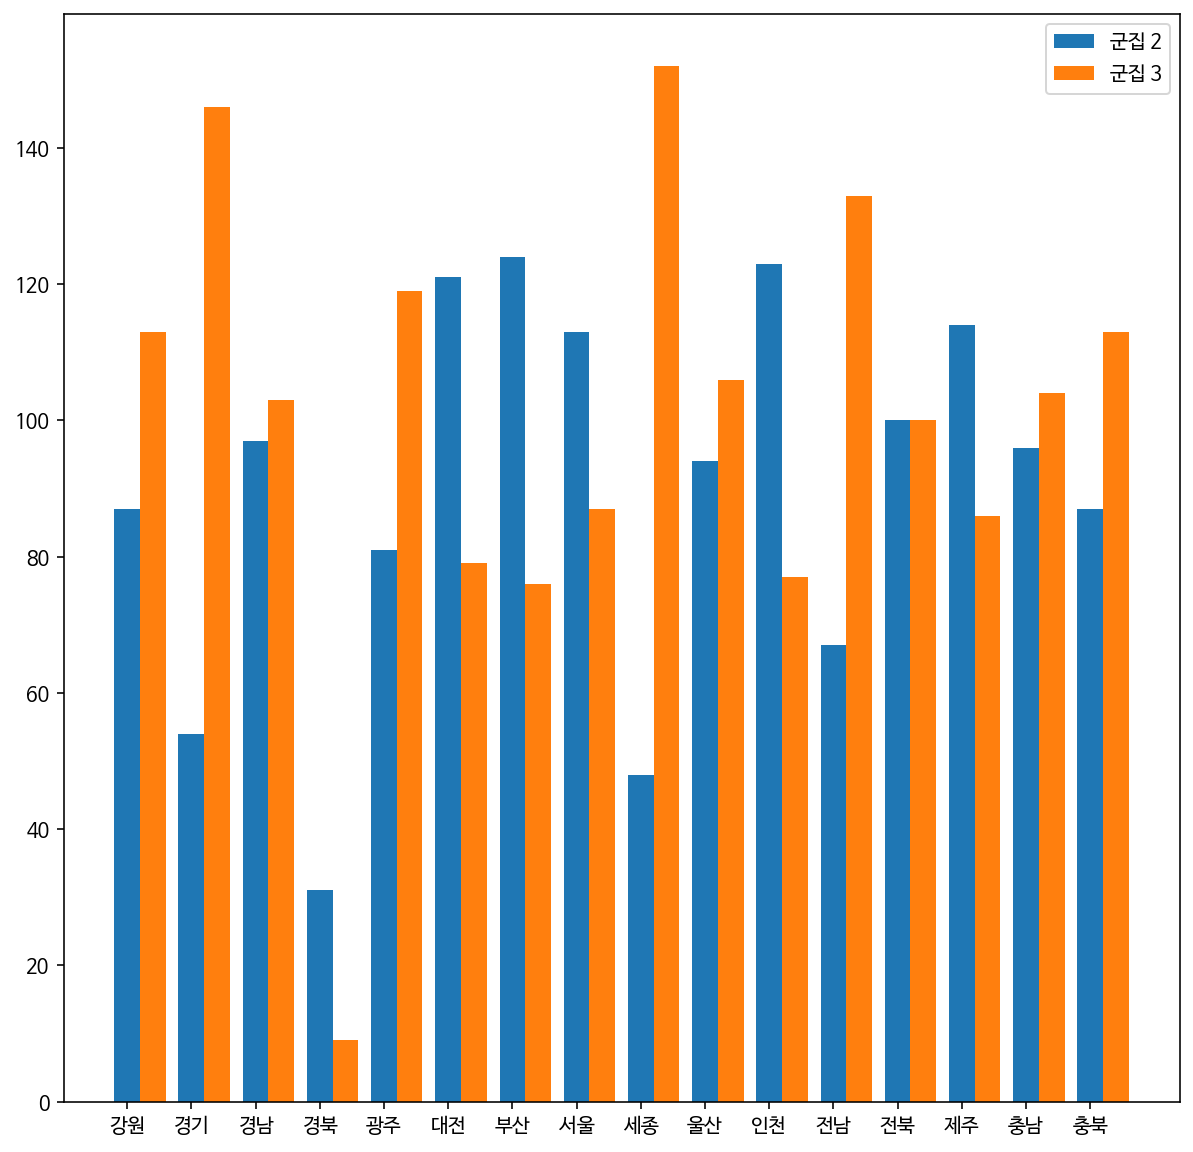

In [51]:
categories = ['강원', '경기', '경남', '경북', '광주', '대전', '부산', '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북']

x = np.arange(len(categories))

v2_2 = df_2_2.groupby(df_2_2['v2']).count()
plt.bar(x+0.0,v2_2.iloc[:,0],width=0.4, label='군집 2')

v2_3 = df_2_3.groupby(df_2_3['v2']).count()
plt.bar(x+0.4,v2_3.iloc[:,0],width=0.4, label='군집 3')

plt.xticks(x,categories)

plt.legend()

plt.title('')
plt.show()

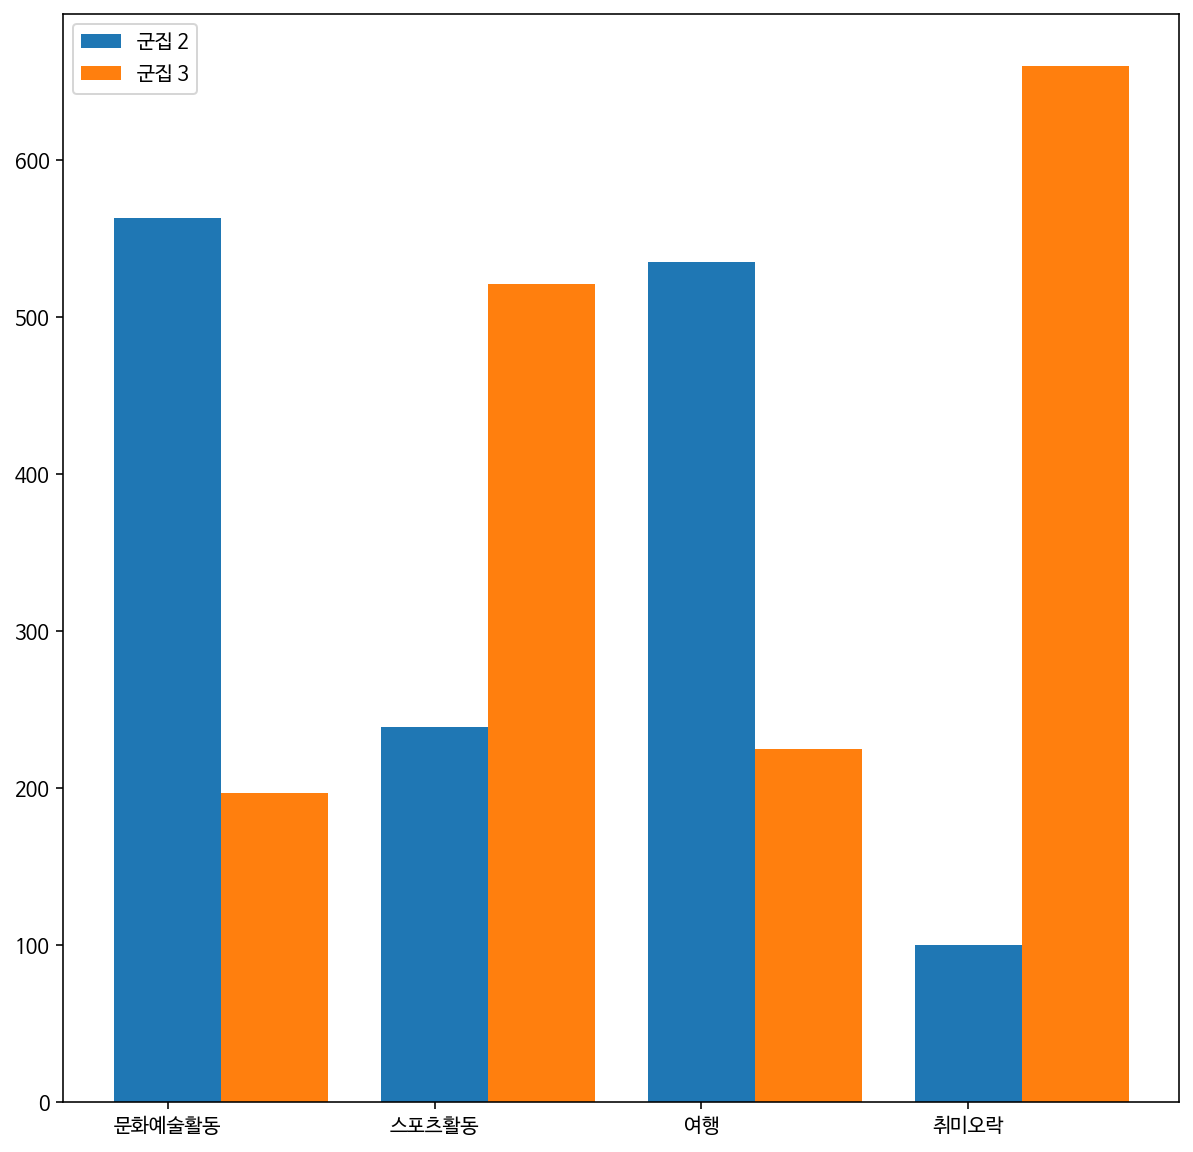

In [53]:
categories = ['문화예술활동', '스포츠활동', '여행', '취미오락']

x = np.arange(len(categories))

gb3_2 = df_2_2.groupby(df_2_2['gb3']).count()
plt.bar(x+0.0,gb3_2.iloc[:,0],width=0.4, label='군집 2')

gb3_3 = df_2_3.groupby(df_2_3['gb3']).count()
plt.bar(x+0.4,gb3_3.iloc[:,0],width=0.4, label='군집 3')

plt.xticks(x,categories)

plt.legend()

plt.title('')
plt.show()

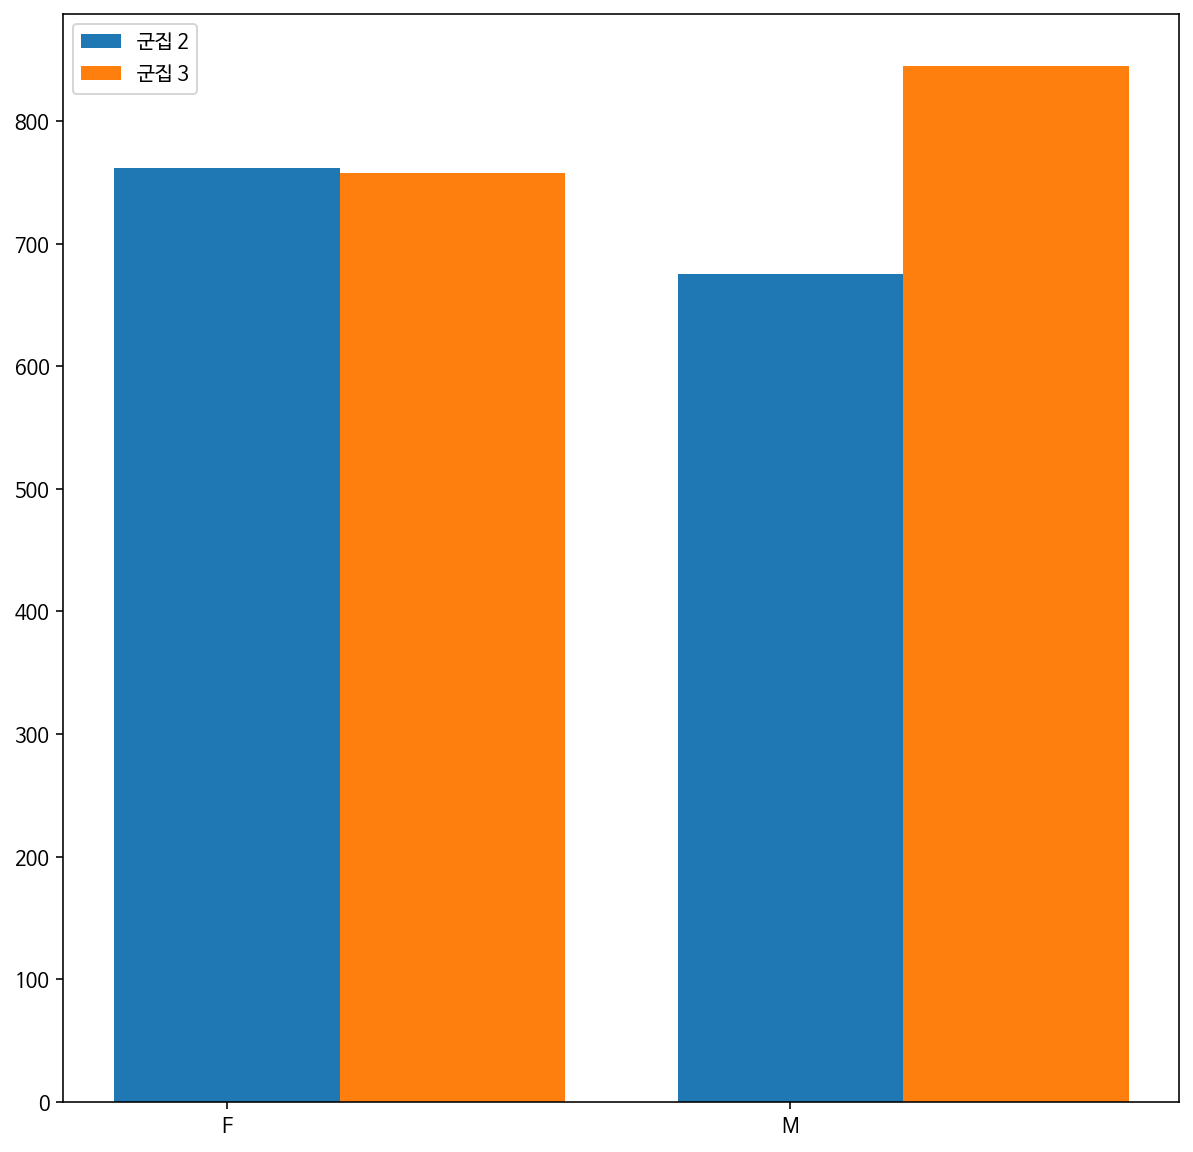

In [55]:
categories = ['F', 'M']

x = np.arange(len(categories))

sex_ccd_2 = df_2_2.groupby(df_2_2['sex_ccd']).count()
plt.bar(x+0.0,sex_ccd_2.iloc[:,0],width=0.4, label='군집 2')

sex_ccd_3 = df_2_3.groupby(df_2_3['sex_ccd']).count()
plt.bar(x+0.4,sex_ccd_3.iloc[:,0],width=0.4, label='군집 3')

plt.xticks(x,categories)

plt.legend()

plt.title('')
plt.show()

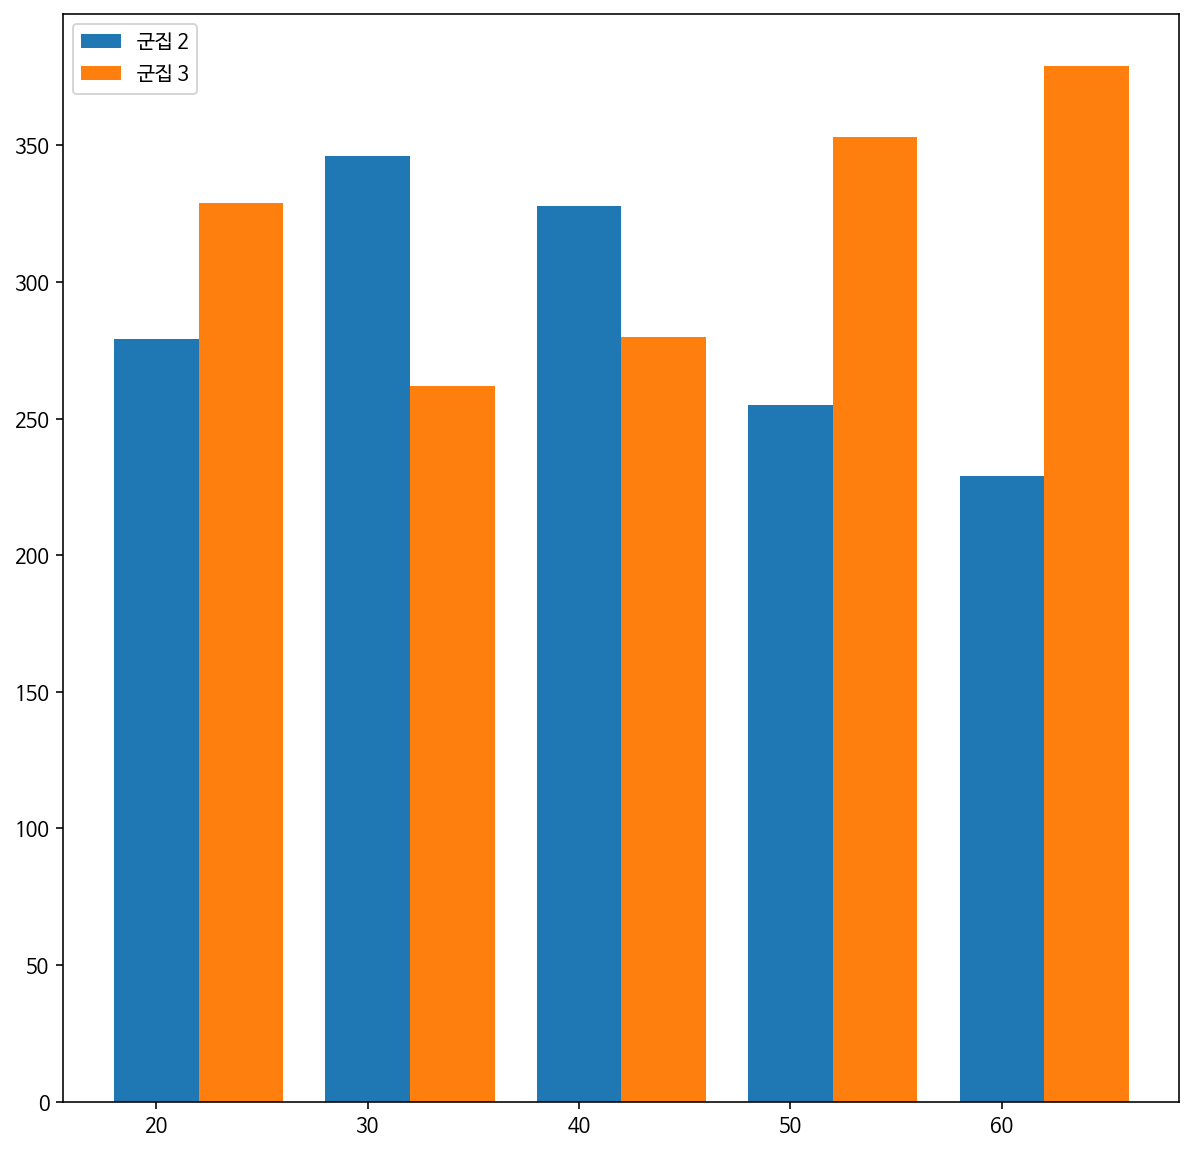

In [56]:
categories = [20, 30, 40, 50, 60]

x = np.arange(len(categories))

cln_age_r_2 = df_2_2.groupby(df_2_2['cln_age_r']).count()
plt.bar(x+0.0,cln_age_r_2.iloc[:,0],width=0.4, label='군집 2')

cln_age_r_3 = df_2_3.groupby(df_2_3['cln_age_r']).count()
plt.bar(x+0.4,cln_age_r_3.iloc[:,0],width=0.4, label='군집 3')

plt.xticks(x,categories)

plt.legend()

plt.title('')
plt.show()

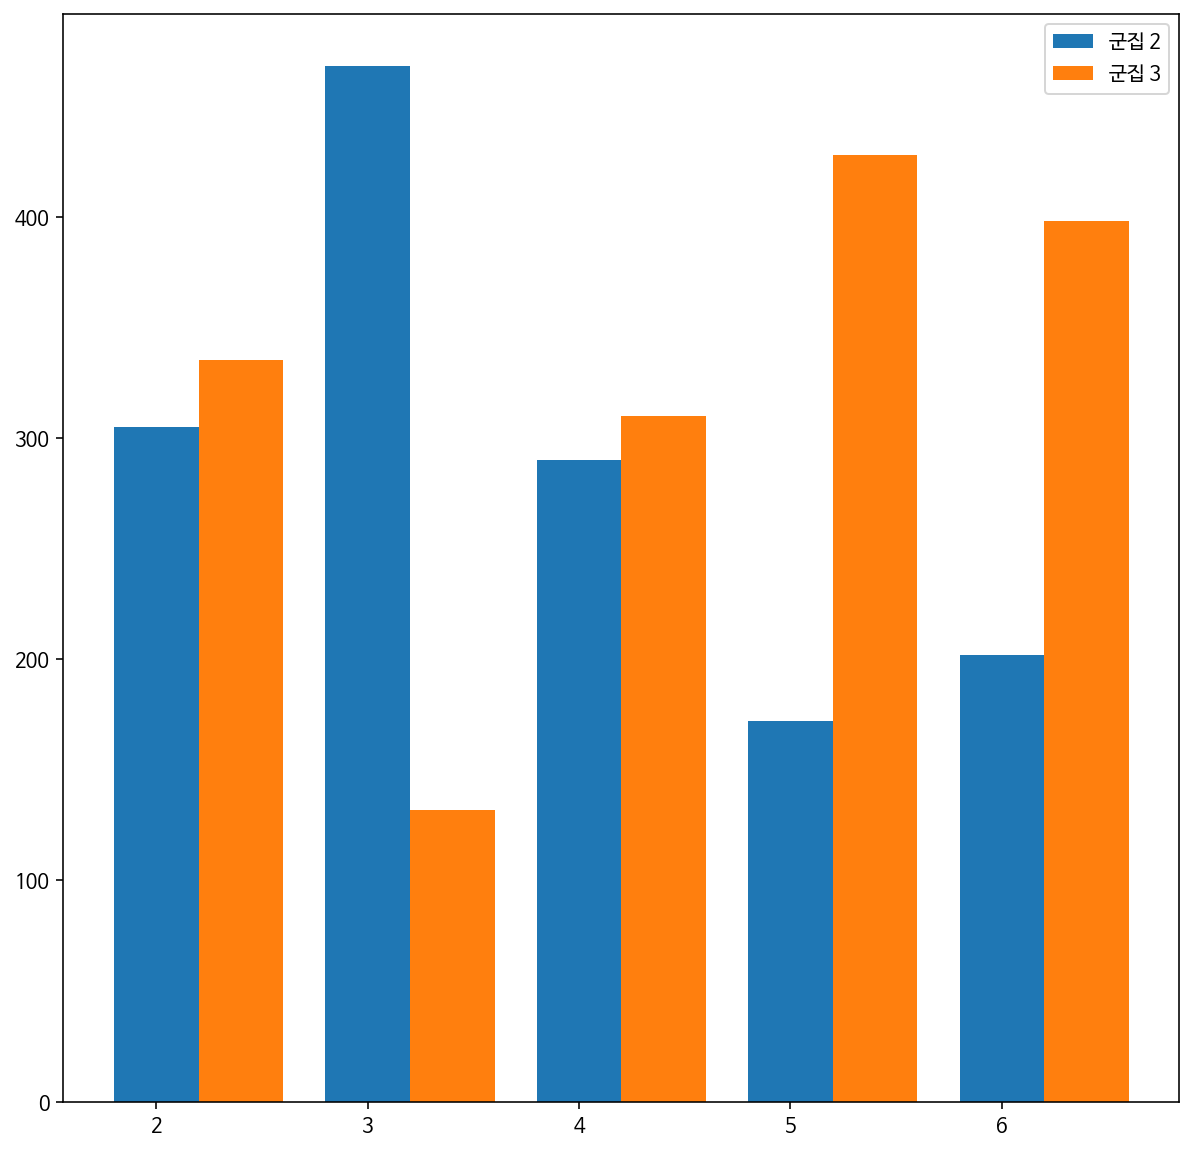

In [58]:
categories = [2, 3, 4, 5, 6]

x = np.arange(len(categories))

ta_ym_2 = df_2_2.groupby(df_2_2['ta_ym']).count()
plt.bar(x+0.0,ta_ym_2.iloc[:,0],width=0.4, label='군집 2')

ta_ym_3 = df_2_3.groupby(df_2_3['ta_ym']).count()
plt.bar(x+0.4,ta_ym_3.iloc[:,0],width=0.4, label='군집 3')

plt.xticks(x,categories)

plt.legend()

plt.title('')
plt.show()